<a href="https://colab.research.google.com/github/metamatematico/hello-world/blob/master/PLNreload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Opción para collab, para opción local solo eliminamos cli

from spacy import displacy
import spacy.cli
#Reto2 # Importación de librerías
from spacy.attrs import ORTH

import matplotlib.pyplot as plt

spacy.cli.download("es_core_news_sm")
pln_es = spacy.load("es_core_news_sm")

#spacy.cli.download("en_core_neb_sm")
#pln_en = spacy.load("en_core_web_sm")
#attrs es un argumento del tipo lista/ Descripción= Lista de atributos para serializar. orth (hash del texto del token) y spacy (si el token va seguido de un espacio en blanco) siempre se serializan, por lo que no son obligatorios. Por defecto es Ninguno.


✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
!spacy download es_core_news_sm 
#Descargando núcleo en español 

In [ ]:
#Separa  # Escribimos las frases con el formato Unicode para estandarizar signos de puntuación en una lista, la función pln_es tokeniza las frases
Frases = [pln_es(u'Tus manos reconocen la piel que habitas las causas perdidas, cálidas agonías sentimientos locos abducen estos días batallas en silencio, nada de ésto se enfría.'),
          pln_es(u'Obtengo una sonrisa, poco a poco un aliento retomo la historia antes de mi nacimiento. Todo lo vivido me ancla a la tierra, es un encuentro lo sembrado, cosechado, construye mi centro.'),
          pln_es(u'Crisálidas estoicas,a sus metamorfosis atentas de remolinos  en combate regresan presente agitan su cuerpo, concentradas agitan su mente procesos restaurados, mucho es lo que apuestas.'),
          pln_es(u'Mis pies tienen ruedas, mi cabeza hélices volver a volar, rodar en todos los vértices. Tomo la miel del panal zumbidos perfectos calco paisajes en mi libreta , todos secretos.')] 
           
          # "u" es símbolo para formato unicode          

In [ ]:
# Separamos la frase por medio de | (Utilizando el comando end)
for Frase in Frases:
    for token in Frase:
        print(token.text, end='|')
    # Imprimimos la cantidad de Tokens (Num) y la cantidad de elementos en el vocabulario (Voc)
    #Num es la cantidad de tokens y el metodo count_by(ORTH) cuenta por ortografía
    print("\n  Num = " + str(len(Frase)) + "\t Voc = " + str(len(Frase.count_by(ORTH))), end = '\n\n')

Tus|manos|reconocen|la|piel|que|habitas|las|causas|perdidas|,|cálidas|agonías|sentimientos|locos|abducen|estos|días|batallas|en|silencio|,|nada|de|ésto|se|enfría|.|
  Num = 28	 Voc = 27

Obtengo|una|sonrisa|,|poco|a|poco|un|aliento|retomo|la|historia|antes|de|mi|nacimiento|.|Todo|lo|vivido|me|ancla|a|la|tierra|,|es|un|encuentro|lo|sembrado|,|cosechado|,|construye|mi|centro|.|
  Num = 38	 Voc = 28

Crisálidas|estoicas|,|a|sus|metamorfosis|atentas|de|remolinos| |en|combate|regresan|presente|agitan|su|cuerpo|,|concentradas|agitan|su|mente|procesos|restaurados|,|mucho|es|lo|que|apuestas|.|
  Num = 31	 Voc = 27

Mis|pies|tienen|ruedas|,|mi|cabeza|hélices|volver|a|volar|,|rodar|en|todos|los|vértices|.|Tomo|la|miel|del|panal|zumbidos|perfectos|calco|paisajes|en|mi|libreta|,|todos|secretos|.|
  Num = 34	 Voc = 28



In [ ]:
#Sirve para ver la forma de los tokens
for Frase in Frases:
    for token in Frase:
        # Imprimimos la forma de cada token
        print(token.shape_, end='|')
    print("\n")

Xxx|xxxx|xxxx|xx|xxxx|xxx|xxxx|xxx|xxxx|xxxx|,|xxxx|xxxx|xxxx|xxxx|xxxx|xxxx|xxxx|xxxx|xx|xxxx|,|xxxx|xx|xxxx|xx|xxxx|.|

Xxxxx|xxx|xxxx|,|xxxx|x|xxxx|xx|xxxx|xxxx|xx|xxxx|xxxx|xx|xx|xxxx|.|Xxxx|xx|xxxx|xx|xxxx|x|xx|xxxx|,|xx|xx|xxxx|xx|xxxx|,|xxxx|,|xxxx|xx|xxxx|.|

Xxxxx|xxxx|,|x|xxx|xxxx|xxxx|xx|xxxx| |xx|xxxx|xxxx|xxxx|xxxx|xx|xxxx|,|xxxx|xxxx|xx|xxxx|xxxx|xxxx|,|xxxx|xx|xx|xxx|xxxx|.|

Xxx|xxxx|xxxx|xxxx|,|xx|xxxx|xxxx|xxxx|x|xxxx|,|xxxx|xx|xxxx|xxx|xxxx|.|Xxxx|xx|xxxx|xxx|xxxx|xxxx|xxxx|xxxx|xxxx|xx|xx|xxxx|,|xxxx|xxxx|.|



In [ ]:
#Reto3# Método para identificar formatos válidos, usese para buscar lo que sea con respecto al metodo shape 
def Extractor_Fechas(Utterance):
    for Token in Utterance:
        # CONTAMOS las veces que aparece el formato
        if Token.shape_.count("X.X.") == 1:
            print(Token.text + " -> " + str(Utterance))

In [ ]:
# Impresión de las formatos encontrados
print("Fechas encontradas:")
for Frase in Frases:
    Extractor_Fechas(Frase)

Fechas encontradas:
M.X. -> Vamos a visitar Edo. de Veracruz en M.X. el año que sigue


In [ ]:
# Extraemos la PoS de cada Token de cada texto y las guardamos en una lista
PoS = []

print("Frases tokenizadas con sus respectivas PoS: \n")
for Frase in Frases:
    for token in Frase:
        PoS.append(token.pos_)
        print(token.text, token.pos_, end=' | ')
    print('\n')
print(PoS)

Frases tokenizadas con sus respectivas PoS: 

Tus ADP | manos NOUN | reconocen VERB | la DET | piel NOUN | que PRON | habitas VERB | las DET | causas NOUN | perdidas ADJ | , PUNCT | cálidas ADJ | agonías NOUN | sentimientos NOUN | locos ADJ | abducen VERB | estos DET | días NOUN | batallas ADJ | en ADP | silencio NOUN | , PUNCT | nada PRON | de ADP | ésto NOUN | se PRON | enfría VERB | . PUNCT | 

Obtengo VERB | una DET | sonrisa NOUN | , PUNCT | poco ADV | a ADP | poco ADV | un DET | aliento NOUN | retomo ADJ | la DET | historia NOUN | antes ADV | de ADP | mi DET | nacimiento NOUN | . PUNCT | Todo DET | lo DET | vivido ADJ | me PRON | ancla VERB | a ADP | la DET | tierra NOUN | , PUNCT | es AUX | un DET | encuentro NOUN | lo DET | sembrado ADJ | , PUNCT | cosechado ADJ | , PUNCT | construye VERB | mi DET | centro NOUN | . PUNCT | 

Crisálidas NOUN | estoicas ADJ | , PUNCT | a ADP | sus DET | metamorfosis NOUN | atentas ADJ | de ADP | remolinos NOUN |   SPACE | en ADP | combate NOUN | 

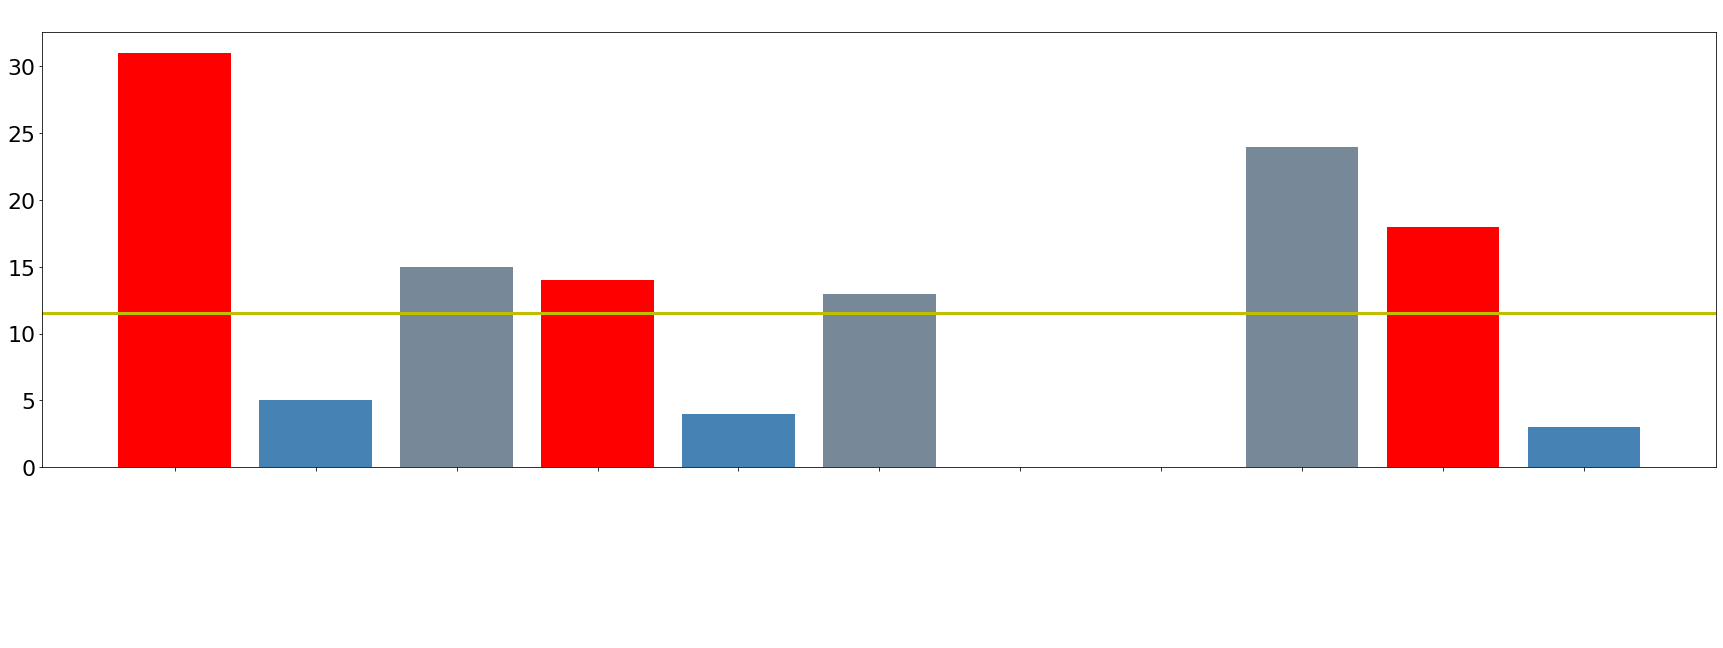

{'Sustantivos': 31, 'Pronombres': 5, 'Verbos': 15, 'Adjetivos': 14, 'Adverbios': 4, 'Preposiciones': 13, 'Conjunciones': 0, 'Interjeccciones': 0, 'Determinantes': 24, 'Signos': 18, 'Auxiliares': 3}


In [ ]:
# Definimos un tamaño para la figura que haremos
plt.figure(figsize=(30, 8))
plt.rcParams.update({'font.size': 22})

# Asignamos la cantidad de veces que aparecen en un diccionario
PoS_Count = {'Sustantivos'     : PoS.count('NOUN'),
             'Pronombres'      : PoS.count('PRON'),
             'Verbos'          : PoS.count('VERB'),
             'Adjetivos'       : PoS.count('ADJ'),
             'Adverbios'       : PoS.count('ADV'),
             'Preposiciones'   : PoS.count('ADP'),
             'Conjunciones'    : PoS.count('CONJ'),
             'Interjeccciones' : PoS.count('INTJ'),
             'Determinantes'   : PoS.count('DET'),
             'Signos'          : PoS.count('PUNCT'),
             'Auxiliares'      : PoS.count('AUX')}

# Impresión de la gráfica a partir del diccionario (Y el promedio de aparición de cada PoS)
plt.bar(PoS_Count.keys(), PoS_Count.values(), color=['red','steelblue','lightslategrey'])
plt.axhline(sum(PoS_Count.values())/len(PoS_Count.values()), lw = 3, c='y', xmax=100)
plt.xticks(rotation = 90, color='white')
plt.title('Cantidad de Pos',color='white') 
plt.show()
print(PoS_Count)

In [ ]:
#Reto4 # Creamos el diccionario con todas las PoS
PoS_Words = {'NOUN' : [], 'PRON': [], 'VERB' : [], 'ADJ' : [], 'ADV'  : [], 
             'ADP'  : [], 'CONJ': [], 'PART' : [], 'DET' : [], 'PROPN': [], 
             'PUNCT': [], 'AUX' : [], 'SCONJ': [], 'NUM': [], 'SYM': [], 'SPACE': []}

# Recopilamos las palabras correspondientes a cada PoS
for Frase in Frases:
    for token in Frase:
        PoS_Words[token.pos_].append(token.text)

# Imprimimos el correspondiente a cada categoría
print("\nPalabras para cada PoS:\n")
for key in PoS_Words.keys():
    print(key + ":\t" + str(set(PoS_Words[key])))

# Encontramos los homógrafos
Words = {}
print("\nPalabras homógramas:\n")
for Frase in Frases:
    for token in Frase:
        if(Words.get(token.text) == None):
            Words.setdefault(token.text, [token.pos_])
        else:
            Words[token.text].append(token.pos_)

# Imprimimos las palabras homógrafas
for Elemento in Words:
    if(len(set(Words[Elemento])) > 1):
        print(Elemento + ":\t" + str(set(Words[Elemento])))


Palabras para cada PoS:

NOUN:	{'agonías', 'manos', 'encuentro', 'Crisálidas', 'panal', 'historia', 'silencio', 'causas', 'cabeza', 'sentimientos', 'aliento', 'hélices', 'metamorfosis', 'centro', 'secretos', 'piel', 'vértices', 'días', 'combate', 'pies', 'libreta', 'ésto', 'cuerpo', 'procesos', 'sonrisa', 'paisajes', 'remolinos', 'nacimiento', 'miel', 'ruedas', 'tierra'}
PRON:	{'que', 'se', 'nada', 'me'}
VERB:	{'reconocen', 'Obtengo', 'regresan', 'abducen', 'volar', 'apuestas', 'rodar', 'enfría', 'construye', 'ancla', 'tienen', 'habitas', 'Tomo', 'agitan'}
ADJ:	{'mente', 'cálidas', 'atentas', 'estoicas', 'presente', 'sembrado', 'perdidas', 'concentradas', 'batallas', 'cosechado', 'restaurados', 'retomo', 'vivido', 'locos'}
ADV:	{'antes', 'poco', 'mucho'}
ADP:	{'en', 'Tus', 'de', 'del', 'a'}
CONJ:	set()
PART:	set()
DET:	{'Mis', 'su', 'lo', 'los', 'la', 'mi', 'las', 'Todo', 'todos', 'estos', 'una', 'sus', 'un'}
PROPN:	{'perfectos', 'zumbidos', 'calco'}
PUNCT:	{'.', ','}
AUX:	{'volver', 

In [ ]:
# Ejemplo para generar árboles de relacion sintáctica
# style = 'dep' da las dependencias
for Frase in Frases:
  displacy.render(Frase, style = 'dep', jupyter = True, options={'distance':120, 'bg':'white', 'color':'black'})
  print(Frase,'\n')

Tus manos reconocen la piel que habitas las causas perdidas, cálidas agonías sentimientos locos abducen estos días batallas en silencio, nada de ésto se enfría. 



Obtengo una sonrisa, poco a poco un aliento retomo la historia antes de mi nacimiento. Todo lo vivido me ancla a la tierra, es un encuentro lo sembrado, cosechado, construye mi centro. 



Crisálidas estoicas,a sus metamorfosis atentas de remolinos  en combate regresan presente agitan su cuerpo, concentradas agitan su mente procesos restaurados, mucho es lo que apuestas. 



Mis pies tienen ruedas, mi cabeza hélices volver a volar, rodar en todos los vértices. Tomo la miel del panal zumbidos perfectos calco paisajes en mi libreta , todos secretos. 



In [ ]:
# De cada frase, eliminamos todas las palabras que representen
# las dependencias sintácticas "Determinante" porque no aportan información

# Declaramos las dependencias para Español e Inglés
Relacion = 'det' 


# Para cada token, obtenemos su dependencia, y si es
# diferente de la declarada, la anexamos al texto de salida
for Frase in Frases:
    Texto = ''
    for token in Frase:
        if(Relacion != str(token.dep_)):
            Texto = Texto + token.text + " "
    print("\n" + str(Frase) + " --> " + str(Texto))


Tus manos reconocen la piel que habitas las causas perdidas, cálidas agonías sentimientos locos abducen estos días batallas en silencio, nada de ésto se enfría. --> Tus manos reconocen piel que habitas causas perdidas , cálidas agonías sentimientos locos abducen días batallas en silencio , nada de ésto se enfría . 

Obtengo una sonrisa, poco a poco un aliento retomo la historia antes de mi nacimiento. Todo lo vivido me ancla a la tierra, es un encuentro lo sembrado, cosechado, construye mi centro. --> Obtengo sonrisa , poco a poco aliento retomo historia antes de nacimiento . vivido me ancla a tierra , es encuentro sembrado , cosechado , construye centro . 

Crisálidas estoicas,a sus metamorfosis atentas de remolinos  en combate regresan presente agitan su cuerpo, concentradas agitan su mente procesos restaurados, mucho es lo que apuestas. --> Crisálidas estoicas , a metamorfosis atentas de remolinos   en combate regresan presente agitan cuerpo , concentradas agitan mente procesos res

 Stemming(Tallo)


In [ ]:
# Importación de la librería de NLTK y el algoritmo
# de truncación "Bola de nieve"
from nltk.stem.snowball import SnowballStemmer

# Declaramos nuestro "truncador" en idioma Español
stemmer = SnowballStemmer(language='spanish')

In [ ]:
# Separamos el stem por medio de | (Utilizando el comando end)
for Frase in Frases:
    for token in Frase:
        # Imprimimos el stem de cada token
        print(stemmer.stem(token.text), end='|')
    print("\n")

tus|man|reconoc|la|piel|que|habit|las|caus|perd|,|cal|agon|sentimient|loc|abduc|estos|dias|batall|en|silenci|,|nad|de|esto|se|enfri|.|

obteng|una|sonris|,|poc|a|poc|un|alient|retom|la|histori|antes|de|mi|nacimient|.|tod|lo|viv|me|ancla|a|la|tierr|,|es|un|encuentr|lo|sembr|,|cosech|,|constru|mi|centr|.|

crisal|estoic|,|a|sus|metamorfosis|atent|de|remolin| |en|combat|regres|present|agit|su|cuerp|,|concentr|agit|su|ment|proces|restaur|,|much|es|lo|que|apuest|.|

mis|pies|tien|rued|,|mi|cabez|helic|volv|a|vol|,|rod|en|tod|los|vertic|.|tom|la|miel|del|panal|zumb|perfect|calc|paisaj|en|mi|libret|,|tod|secret|.|



In [ ]:
# Obtenemos de cada Frase (Trabalenguas) los diferentes seteams que
# lo conforman, y los almacenamos temporalmente en una lista
# añdiendo los que son diferentes y aumentando el contador de número
# (descartamos aquellos que sean signos de puntuación):

Stems_Diferentes = []
for Trab in Frases:
    Stems = []
    Stems_Number = 0
    for token in Trab:
        if(stemmer.stem(token.text) not in Stems) and (token.text != 'PUNCT'):
            st = Stems.append(stemmer.stem(token.text))
            Stems_Number += 1
    Stems_Diferentes.append(Stems_Number)
    
# Obtenemos los valores para cada nivel de complejidad basados en
# el criterio de (No. de Stems / Cantidad de palabras):
Dificultad = []

for i in range(len(Stems_Diferentes)):
    Dificultad.append(Stems_Diferentes[i] / len(Frases[i]))
 

    # Imprimimos el trabalenguas más DIFÍCIL:
# (El que tenga el valor más bajo del criterio anterior)
print("El trabalenguas más difícil es:\n")
indice = Dificultad.index(min(Dificultad))
print(Frases[indice])
print("\nContiene " + str(Stems_Diferentes[indice]) + " Stems en " + str(len(Frases[indice])) + " palabras")

# Imprimimos el trabalenguas más Fácil:
# (El que tenga el valor más alto del criterio anterior)
print("\n\nEl trabalenguas más fácil es:\n")
indice = Dificultad.index(max(Dificultad))
print(Frases[indice])
print("\nContiene " + str(Stems_Diferentes[indice]) + " Stems en " + str(len(Frases[indice])) + " palabras"+ str(indice))

El trabalenguas más difícil es:

Obtengo una sonrisa, poco a poco un aliento retomo la historia antes de mi nacimiento. Todo lo vivido me ancla a la tierra, es un encuentro lo sembrado, cosechado, construye mi centro.

Contiene 28 Stems en 38 palabras


El trabalenguas más fácil es:

Tus manos reconocen la piel que habitas las causas perdidas, cálidas agonías sentimientos locos abducen estos días batallas en silencio, nada de ésto se enfría.

Contiene 27 Stems en 28 palabras0


Lematización

In [ ]:
# Contador de tokens diferentes (Antes de aplicar lematización)
#Ejercicio solo para comparar tokens y lemas

# Extraer directamente los tokens en el texto
Tokens = [tok.lemma_.lower() for tok in Frase if not tok.is_punct | tok.is_stop]

# Eliminar los elementos repetidos de la lista
TokensDif = set(Tokens)

# Extraer las lematizaciones del texto original
Lemmas = [lem.text.lower() for lem in Frase if not lem.is_punct | lem.is_stop]

# Eliminar los elementos repetidos de la lista
LemmasDif = set(Lemmas)

# Impresión de resultados
print("Tokens encontrados en todo el texto: " + str(len(Frase)))
print("Tokens DIFERENTES en todo el texto: " + str(len(TokensDif)))
print("Lemmas DIFERENTES en todo el texto: " + str(len(LemmasDif)))

Tokens encontrados en todo el texto: 34
Tokens DIFERENTES en todo el texto: 18
Lemmas DIFERENTES en todo el texto: 18


ZeroDivisionError: ignored

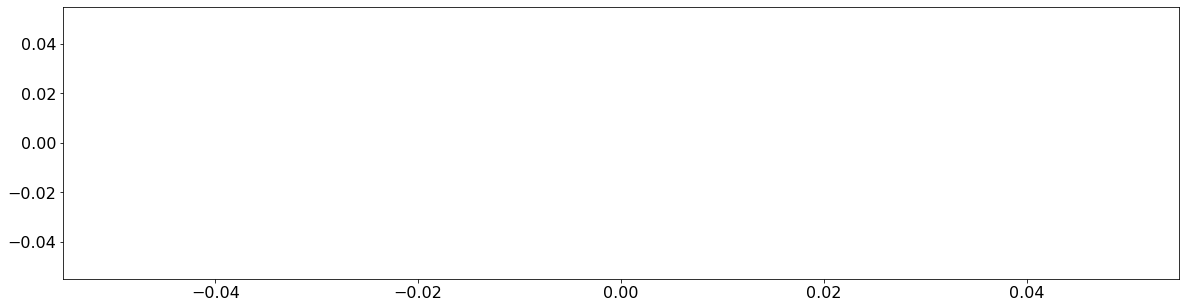

In [ ]:
# Agregamos en un diccionario cada token y su frecuencia de aparición. 

DicTokens = {}
DicTokens2 = {}
for Token in Tokens:
    if(DicTokens.get(Token) == None):
        DicTokens.setdefault(Token, 1)
    else:
        DicTokens[Token] += 1
  
# Creamos un nuevo diccionario con solo los
# tokens que aparecen más de 3 veces en el texto
# Si no hay toquens que satisfagan la frecuncia hay una division por cero
for Element in DicTokens:
    if(DicTokens.get(Element) > 3):
        DicTokens2.setdefault(Element, DicTokens.get(Element))
      
# Graficamos cada token contra la cantidad de veces que aparece
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,5))
plt.bar(DicTokens2.keys(), DicTokens2.values(), color=['lightblue','steelblue','lightslategrey'])
plt.axhline(sum(DicTokens2.values())/len(DicTokens2.values()), lw = 3, c='r', xmax=100)
plt.title('Tokens diferentes') 
plt.xticks(rotation=80)
plt.show()

In [ ]:
# Aregamos en un diccionario cada Lemma y su frecuencia de aparición
DicLemmas = {}
DicLemmas2 = {}
for Lemma in Lemmas:
    if(DicLemmas.get(Lemma) == None):
        DicLemmas.setdefault(Lemma, 1)
    else:
        DicLemmas[Lemma] += 1

# Creamos un nuevo diccionario que conserve
# solo los lemmas que aparecen más de 3 veces en el texto
#mismo problema si no hay lemas qeu superen la frecuancia hay una division por cero
for Element in DicLemmas:
    if(DicLemmas.get(Element) > 3):
        DicLemmas2.setdefault(Element, DicLemmas.get(Element))
      
# Graficamos cada lemma contra la cantidad de veces que aparece
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,5))
plt.bar(DicLemmas2.keys(), DicLemmas2.values(), color=['lightblue','steelblue','lightslategrey'])
plt.axhline(sum(DicLemmas2.values())/len(DicLemmas2.values()), lw = 3, c='r', xmax=100)
plt.title('Lemmas diferentes') 
plt.xticks(rotation=80)
plt.show()

In [ ]:
# Ejemplos de exracción automática de entidades y sus significados
#Las entidades son aquellas palabras o grupos de palabras que por el lugar que se encuentran dentro de
#una oración, por su propia naturaleza o por las palabras que se ubican antes o después de las mismas,
#pertenecen a grupos específicos.

# MISC -->  Miscelaneo      [Miscellaneous entities, e.g. events, nationalities, products or works of art]
# LOC  -->  Locación        [Non-GPE locations, mountain ranges, bodies of water]
# ORG  -->  Organización    [Company's Name, Enterprise]
# PER  -->  Nombre Persona  [Named person or family.]

for Frase in Frases:
    for entity in Frase.ents:#atributo ents regresa las entidades
        print(entity)
        print(entity.label)#atributo label devuelve categoria de la entidad
        print(str(spacy.explain(entity.label)))#agrega una explicación
        print('\n')

Obtengo
385
None


Todo lo vivido me ancla a la tierra
7654241940133152407
None


Tomo
4317129024397789502
None




In [ ]:
for Frase in Frases:
  displacy.render(Frase, style = 'ent', jupyter = True, options={'distance':110})

/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


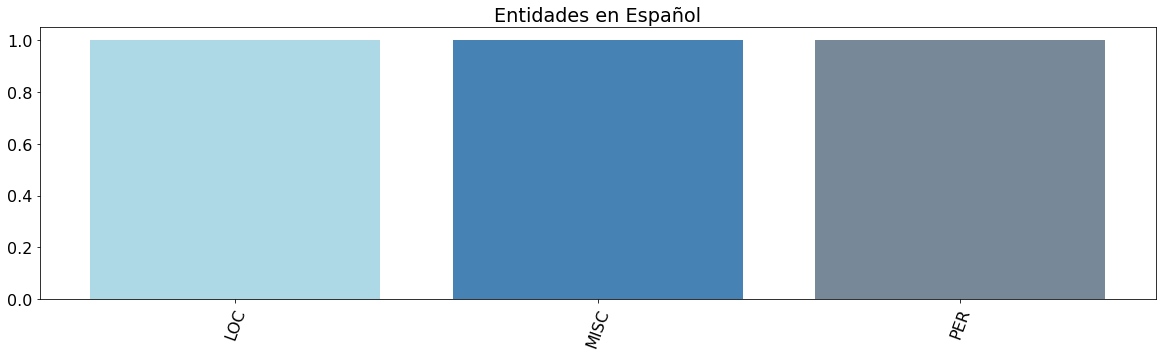

In [ ]:
# Creación de gráficas / Histogramas con las entidades detectadas
Entidades = {}
for Frase in Frases:
    for Entidad in Frase.ents:
        if(Entidades.get(Entidad.label_) == None):
            Entidades.setdefault(Entidad.label_, 1)
        else:
            Entidades[Entidad.label_] += 1



# Impresión de la gráfica a partir del diccionario
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,5))
plt.bar(Entidades.keys(), Entidades.values(), color=['lightblue','steelblue','lightslategrey']) 
plt.title('Entidades en Español') 
plt.xticks(rotation = 70)
plt.show()



Etiquetado

In [ ]:
#es una técnica basada en relaciones gramaticales que permite conocer
#información detallada de las palabras en una frase. Entre otras cosas se incluye su PoS, su género, su
#conjugación (tiempo verbal y persona)
for Frase in Frases:
  for token in Frase:
    print("{:15s} {:s}".format(token.text, token.tag_)) #tag_ regresa la Pos del token y luego información variable

Tus             ADP__AdpType=Preppron|Gender=Masc|Number=Sing
manos           NOUN__Gender=Fem|Number=Plur
reconocen       VERB__Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin
la              DET__Definite=Def|Gender=Fem|Number=Sing|PronType=Art
piel            NOUN__Gender=Fem|Number=Sing
que             PRON__PronType=Rel
habitas         VERB__Mood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin
las             DET__Definite=Def|Gender=Fem|Number=Plur|PronType=Art
causas          NOUN__Gender=Fem|Number=Plur
perdidas        ADJ__Gender=Fem|Number=Plur|VerbForm=Part
,               PUNCT__PunctType=Comm
cálidas         ADJ__Gender=Fem|Number=Plur|VerbForm=Part
agonías         NOUN__Gender=Fem|Number=Plur
sentimientos    NOUN__Gender=Masc|Number=Plur
locos           ADJ__Gender=Masc|Number=Plur
abducen         VERB__Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin
estos           DET__Gender=Masc|Number=Plur|PronType=Dem
días            NOUN__Gender=Masc|Number=Plur
batall

In [ ]:
#Uso de las tags, los sigueintes 4 ejemplos sirven para buscar errores gramaticales
# Módulo para identificar Caso 1 (coma entre sujeto y predicado)
# Tips:
# A) Encontrar en la frase los tokens que sean iguales a ','
# B) Verificar que el token anterior a ese sea un Sujeto (NOUN o PRON)
# y que el posterior sea un verbo o verbo auxiliar (VERB o AUX)
C1 = []
for Frase in Frases:
    index = []
    Tokens = [token.text for token in Frase]
    Tags = [token.tag_ for token in Frase]
    try:
        index.append(Tokens.index(','))
        for ind in index:
            if(Tags[ind-1].split("_")[0] == 'NOUN' and 
              (Tags[ind+1].split("_")[0] == 'VERB' or Tags[ind+1].split("_")[0] == 'AUX')):
                C1.append(Frase)
    except:
        True
    
print("Errores de Caso1 encontrados:\n")
for Error in C1:
    print(Error)

Errores de Caso1 encontrados:



In [ ]:
# Módulo para identificar Caso 2 (Determinantes de palabras que empiezan con a tónica)
# Nota: Identificar la sílaba tónica de una palabra requiere de un proceso
# más complejo, simplemente identificar el caso "la" + "á____",
# "la" + "a____" (<=5 caracteres) o "la" + "ha____" (<=5 caracteres)
# Tips:
# A) Encontrar en la frase los tokens que contengan "la" o "La" (Usar lower())
# B) Verificar que el token siguiente tenga en su primer caracter "á" o que
# en sus dos primeros caracteres tenga "a_" o "ha" con menos de 6 caracteres totales
C2 = []
for Frase in Frases:
    index = []
    Tokens = [token.text.lower() for token in Frase]
    try:
        index.append(Tokens.index("la"))
        for ind in index: 
            if(Tokens[ind + 1][0] == 'á'
               or (Tokens[ind + 1][0] == 'a' and len(Tokens[ind+ 1]) <= 5)
               or (Tokens[ind + 1][0:2] == 'ha' and len(Tokens[ind + 1]) <= 5)):
                C2.append(Frase) 
    except:
        True

print("Errores de Caso2 encontrados:\n")
for Error in C2:
    print(Error)

Errores de Caso2 encontrados:



In [ ]:
# Módulo para identificar Caso 3 (Verbo + sujeto en plural)
# Nota, la combinación incorrecta a econtrar es:
# Auxiliar(En plural) + Determinante
# (Había mucha gente) (Habían muchas personas)
# Tips:
# A) Encontrar en la frase los Tags que sean verbos auxiliares (AUX)
# B) Verificar que ese verbo auxiliar sea plural (Number=Plur)
# C) Verificar que el siguiente Tag corresponda a un determinante (DET)
C3 = []
for Frase in Frases:
    index = []
    Tokens = [token.text for token in Frase]
    Tags = [token.tag_ for token in Frase]                                                                                                                                                                                                                        
    try:
        for Tag in Tags:
            if((Tag.split("_")[0] == 'AUX' and Tag.count('Plur'))
               and (Tags[Tags.index(Tag) + 1].split("_")[0] == 'DET')):
                C3.append(Frase)
    except:
        True
    
print("Errores de Caso3 encontrados:\n")
for Error in C3:
    print(Error)

Errores de Caso3 encontrados:



In [ ]:
#reto 9
# Módulo para identificar Caso 4 (Mezclar tiempos gramaticales)
# Nota, aplica cuando en la frase, existen dos tiempos gramaticales
# distintos, pero no hay ninguna conjunción, conjunción subordinada
# conjunción de coordinación, o cualquier tipo de conjunción que
# separe la frase en dos ideas distintas.
# Tips:
# A) Encontrar en la frase los Tags que correspondan a verbos (VERB)
# B) Ver si dentro de la misma frase existen verbos con diferentes tiempos gramaticales
# C) Revisar si dentro de esa misma frase existe algún tipo de conjunción que
# separe las ideas. (De manera simple solo verificar que existen)
C4 = []
for Frase in Frases:
    Tenses = []
    Tokens = [token.text for token in Frase]
    Tags = [token.tag_ for token in Frase]
    try:
        for Tag in Tags:
            if(Tag.split("_")[0] == 'VERB'):
                Tenses.append(Tag[Tag.find('Tense') + 6 : Tag.find('VerbForm') - 1])
                if(len(Tenses) > 1):
                    Tags2 = [Tag.split("_")[0] for Tag in Tags]
                    if(Tags2.count("CONJ")==0 and Tags2.count("CCONJ")==0 and Tags2.countn("SCONJ")==0):
                        C4.append(Frase)
    except:
        True
    
print("Errores de Caso4 encontrados:\n")
for Error in C4:
    print(Error)

Errores de Caso4 encontrados:



Data Augmentation